In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## data input

In [ ]:
import pandas as pd
import numpy as np
# Load your data
file_path = "...ed_data.csv"
df = pd.read_csv(file_path)
print(f"Original data loaded with {df.shape[0]} rows and {df.shape[1]} columns.")
df = df.drop(columns=['RFV1','RFV2','RFV3','RFV4','RFV5','CAUSE1','CAUSE2','CAUSE3'])
df1 = df.copy()
#df1 = df1.drop(columns=['VMONTH','Combined_clean'])
df1 = df1.drop(columns=['VMONTH'])


counts = df['PAYTYPER'].value_counts(dropna=False)
print(counts)


In [ ]:
def convert_to_category_no_fill(df, col, mapping, is_numeric=True, subtract_one=False):

    if is_numeric:
        df[col] = pd.to_numeric(df[col], errors="coerce")
        if subtract_one:
            df[col] = df[col] - 1

    df[col] = df[col].map(mapping)
    return df


conversion_settings = {
    "EPISODE": {"mapping": {1: "Initial visit", 2: "Follow-up visit"}, "is_numeric": True, "subtract": False},
    "ARRTIME2": {"mapping": {0: "Morning", 1: "Afternoon", 2: "Evening", 3: "Night"}, "is_numeric": True, "subtract": False},
    "RACERETH": {"mapping": {1: "White", 2: "Black", 3: "Hispanic", 4: "Other"}, "is_numeric": True, "subtract": False},
    "RESIDNCE": {"mapping": {1: "Private residence", 2: "Nursing home", 3: "Homeless", 4: "Other"}, "is_numeric": True, "subtract": False},
    "ARREMS": {"mapping": {1: "Yes", 2: "No"}, "is_numeric": True, "subtract": False},
    "SEEN72": {"mapping": {1: "Yes", 2: "No"}, "is_numeric": True, "subtract": False},
    "INJPOISAD": {"mapping": {1: "None", 2: "Injury", 3: "Overdose", 4: "Adverse Effect", 5: "Questionable"}, "is_numeric": True, "subtract": False},
    "IMMEDR1": {"mapping": {1: "Immediate", 2: "Emergency", 3: "Urgent", 4: "Semi-urgent", 5: "Non-urgent"}, "is_numeric": True, "subtract": False},
    "PAYTYPER":{"mapping": {1: "Private insurance", 2: "Medicare", 3: "Medicaid or CHIP", 4: "Other", 5: "Uninsured", 6: "Uninsured", 7: "Other"}, "is_numeric": True, "subtract": False}
}

counts = df['PAYTYPER'].value_counts(dropna=False)
print(counts)


for col, settings in conversion_settings.items():
    df = convert_to_category_no_fill(
        df, col,
        mapping=settings["mapping"],
        is_numeric=settings.get("is_numeric", True),
        subtract_one=settings.get("subtract", False)
    )
print("Converted originally categorical columns without filling missing values.")


def map_age(x):
    try:
        x = float(x)
    except:
        return np.nan
    if x < 40:
        return "18–39"
    elif 40 <= x < 65:
        return "40–65"
    elif x >= 65:
        return ">=65"
    return np.nan

def map_vdayr(x):
    try:
        x = int(x)
    except:
        return np.nan
    if 1 <= x <= 5:
        return "Weekdays"
    elif x in [6, 7]:
        return "Weekend"
    return np.nan

def map_painscale(x):
    try:
        x = float(x)
    except:
        return np.nan
    if 0 <= x <= 3:
        return "No pain"
    elif 4 <= x <= 6:
        return "Mild"
    elif 7 <= x <= 10:
        return "Severe"
    return np.nan

def map_tempf(x):
    try:
        x = float(x)
    except:
        return np.nan
    if x <= 36:
        return "<=36°C"
    elif 36 < x <= 38:
        return "36-38°C"
    elif x >= 38:
        return ">38°C"
    return np.nan

def map_pulse(x):
    try:
        x = float(x)
    except:
        return np.nan
    if x <= 60:
        return "<=60"
    elif 61 <= x <= 90:
        return "61-90"
    elif x > 90:
        return ">90"
    return np.nan

def map_bpsys(x):
    try:
        x = float(x)
    except:
        return np.nan
    if x < 80:
        return "<80"
    elif 80 <= x <= 120:
        return "80–120"
    elif x >= 120:
        return ">120"
    return np.nan

def map_popct(x):
    try:
        x = float(x)
    except:
        return np.nan
    if x < 95:
        return "<95%"
    elif 95 <= x <= 100:
        return "95%+"
    return np.nan

def map_respr(x):
    try:
        x = float(x)
    except:
        return np.nan
    if x < 12:
        return "<12"
    elif 12 <= x <= 20:
        return "12-20"
    elif x > 20:
        return ">20"
    return np.nan

def map_bpdiast(x):
    try:
        x = float(x)
    except:
        return np.nan
    if x == -9 or x == 998:
        return np.nan
    if x < 60:
        return "<60"
    elif 60 <= x <= 80:
        return "60–80"
    elif x > 80:
        return ">80"
    return np.nan


df["AGE"] = df["AGE"].apply(map_age)
df["VDAYR"] = df["VDAYR"].apply(map_vdayr)
df["PAINSCALE"] = df["PAINSCALE"].apply(map_painscale)
df["TEMPF"] = df["TEMPF"].apply(map_tempf)
df["PULSE"] = df["PULSE"].apply(map_pulse)
df["BPSYS"] = df["BPSYS"].apply(map_bpsys)
df["POPCT"] = df["POPCT"].apply(map_popct)
df["RESPR"] = df["RESPR"].apply(map_respr)
df["BPDIAS"] = df["BPDIAS"].apply(map_bpdiast)


simple_mappings = {
    "SEX": {1: "Female", 2: "Male"}
}

for col, mapping in simple_mappings.items():
    if col in df.columns:
        df[col] = df[col].map(mapping)

var_mappings = {
    "Gender": ("SEX", {"Female": "Female", "Male": "Male"}),
    "Age": ("AGE", {"18–39": "18–39", "40–65": "40–65", ">=65": ">=65"}),
    "Race/ethnicity": ("RACERETH", {"White": "White", "Black": "Black", "Hispanic": "Hispanic", "Other": "Other"}),
    "Residence type": ("RESIDNCE", {"Private residence": "Private residence", "Nursing home": "Nursing home", "Homeless": "Homeless", "Other": "Other"}),
    "Insurance type": ("PAYTYPER", {"Private insurance": "Private insurance", "Medicare": "Medicare", "Medicaid or CHIP": "Medicaid or CHIP", "Uninsured": "Uninsured", "Other": "Other"}),
    "Day of Week": ("VDAYR", {"Weekdays": "Weekdays", "Weekend": "Weekend"}),
    "Arrival time": ("ARRTIME2", {"Morning": "Morning", "Afternoon": "Afternoon", "Evening": "Evening", "Night": "Night"}),
    "Seen within last 72 hours": ("SEEN72", {"No": "No", "Yes": "Yes"}),
    "Episode": ("EPISODE", {"Initial visit": "Initial visit", "Follow-up visit": "Follow-up visit"}),
    "Arrive by ambulance": ("ARREMS", {"No": "No", "Yes": "Yes"}),
    "Pain level": ("PAINSCALE", {"No pain": "No pain", "Mild": "Mild", "Severe": "Severe"}),
    "Temp": ("TEMPF", {"36-38°C": "36-38°C", "<=36°C": "<=36°C", ">38°C": ">38°C"}),
    "Heart Rate": ("PULSE", {"61-90": "61-90", "<=60": "<=60", ">90": ">90"}),
    "SBP": ("BPSYS", {"80–120": "80–120", "<80": "<80", ">120": ">120"}),
    "DBP": ("BPDIAS", {"60–80": "60–80", "<60": "<60", ">80": ">80"}),
    "Oxygen Saturation": ("POPCT", {"95%+": "95%+", "<95%": "<95%"}),
    "Resp. Rate": ("RESPR", {"12-20": "12-20", "<12": "<12", ">20": ">20"}),
    "Injury/Adverse Effect": ("INJPOISAD", {"None": "None", "Injury": "Injury", "Overdose": "Overdose", "Adverse Effect": "Adverse Effect", "Questionable": "Questionable"}),
    "Emergency Severity": ("IMMEDR1", {"Immediate": "Immediate", "Emergency": "Emergency", "Urgent": "Urgent", "Semi-urgent": "Semi-urgent", "Non-urgent": "Non-urgent"}),
}

medical_history_mapping = {
    "Alzheimer's": "ALZHD",
    "Asthma": "ASTHMA",
    "Cancer": "CANCER",
    "Stroke": "CEBVD",
    "CKD": "CKD",
    "COPD": "COPD",
    "CHF": "CHF",
    "CAD": "CAD",
    "Depression": "DEPRN",
    "DM: Type unspecified": "DIABTYP0",
    "DM I": "DIABTYP1",
    "DM II": "DIABTYP2",
    "ESRD": "ESRD",
    "PE/DVT/VTE": "HPE",
    "HIV": "EDHIV",
    "Hyperlipidemia": "HYPLIPID",
    "Hypertension": "HTN",
    "Obesity": "OBESITY",
    "OSA": "OSA",
    "Osteoporosis": "OSTPRSIS",
    "Substance Abuse": "SUBSTAB"
}

for disp_name, (col_name, mapping) in var_mappings.items():
    if col_name in df.columns:
        cat_order = list(mapping.values())
        df[col_name] = pd.Categorical(df[col_name], categories=cat_order, ordered=True)

print("Data conversion completed without filling missing values.")

counts = df['PAYTYPER'].value_counts(dropna=False)
print(counts)

PAYTYPER
3.0    3799
1.0    3482
2.0    3201
NaN    1242
5.0     895
7.0     372
4.0      78
6.0      46
Name: count, dtype: int64
Converted originally categorical columns without filling missing values.
Data conversion completed without filling missing values.
PAYTYPER
Medicaid or CHIP     3799
Private insurance    3482
Medicare             3201
NaN                  1242
Uninsured             941
Other                 450
Name: count, dtype: int64


## Table 1

In [ ]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency

def create_table1(df, var_mappings, med_history_mapping):
    def get_table1_for_variable(df, col_name, display_name, convert_index_binary=False):
        # Create a contingency table between the variable and the target "IVFLUIDS"
        counts = pd.crosstab(df[col_name], df["IVFLUIDS"])

        # If the contingency table is empty, return a row indicating no data.
        if counts.empty:
            return pd.DataFrame([{
                "Variable": f"{display_name} (No data available)",
                "No": "",
                "Yes": "",
                "p-value": ""
            }])

        # For binary variables (0/1 or No/Yes), rename columns and/or index if requested
        if set(counts.columns) == {0, 1}:
            counts = counts.rename(columns={0: "No", 1: "Yes"})
        if convert_index_binary and set(counts.index) == {0, 1}:
            counts = counts.rename(index={0: "No", 1: "Yes"})

        # Ensure both "No" and "Yes" columns exist
        for group in ["No", "Yes"]:
            if group not in counts.columns:
                counts[group] = 0

        counts = counts.sort_index()
        percentages = counts.apply(lambda x: (x / x.sum() * 100).round(1))

        # Compute chi-square p-value; if error occurs, set to N/A.
        try:
            chi2, p_val, _, _ = chi2_contingency(counts)
        except ValueError:
            p_val = np.nan

        rows = []
        # Add the variable header row with the chi-square p-value
        rows.append({
            "Variable": f"{display_name}",
            "No": "",
            "Yes": "",
            "p-value": f"{p_val:.4f}" if not pd.isna(p_val) else "N/A"
        })
        # Add one row per category in the contingency table
        for cat in counts.index:
            no_val = counts.loc[cat, "No"]
            no_pct = percentages.loc[cat, "No"]
            yes_val = counts.loc[cat, "Yes"]
            yes_pct = percentages.loc[cat, "Yes"]
            rows.append({
                "Variable": f"  {cat}",
                "No": f"{no_val} ({no_pct}%)",
                "Yes": f"{yes_val} ({yes_pct}%)",
                "p-value": ""
            })
        return pd.DataFrame(rows)

    combined_tables = []

    # Process variables in var_mappings normally (these will include both "No" and "Yes" rows)
    for disp_name, (col_name, mapping) in var_mappings.items():
        if col_name in df.columns:
            table_df = get_table1_for_variable(df, col_name, disp_name, convert_index_binary=False)
            combined_tables.append(table_df)
        else:
            combined_tables.append(pd.DataFrame([{
                "Variable": f"{disp_name} (Column '{col_name}' not found)",
                "No": "",
                "Yes": "",
                "p-value": ""
            }]))

    # Process medical history variables;
    # remove any row corresponding to the "Yes" category.
    for disp_name, col_name in med_history_mapping.items():
        if col_name in df.columns:
            table_df = get_table1_for_variable(df, col_name, disp_name, convert_index_binary=True)
            # Remove the row(s) where the category (after stripping whitespace) equals "Yes"
            table_df = table_df[~table_df["Variable"].str.strip().eq("No")]
            combined_tables.append(table_df)
        else:
            combined_tables.append(pd.DataFrame([{
                "Variable": f"{disp_name} (Column '{col_name}' not found)",
                "No": "",
                "Yes": "",
                "p-value": ""
            }]))

    # Concatenate all parts without adding an extra header row.
    final_table = pd.concat(combined_tables, ignore_index=True)
    return final_table

# Example usage:
# (Assume df0, var_mappings, and medical_history_mapping are already defined.)
table1 = create_table1(df, var_mappings, medical_history_mapping)

# Set pandas display options so that the table is printed fully without collapsing.
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Print table1 without the additional header row.
print(table1.to_string(index=False))

# Save table1 to a CSV file without including the index
table1.to_csv("/content/drive/MyDrive/Areas/Papers/GPT Pitts/results/table1.csv", index=False)
print("table1 has been saved as table1.csv")

                 Variable           No          Yes p-value
                   Gender                            0.0008
                   Female 4728 (53.0%) 2354 (56.1%)        
                     Male 4194 (47.0%) 1839 (43.9%)        
                      Age                            0.0000
                    18–39 3864 (43.3%) 1295 (30.9%)        
                    40–65 3201 (35.9%) 1623 (38.7%)        
                     >=65 1857 (20.8%) 1275 (30.4%)        
           Race/ethnicity                            0.0000
                    White 5008 (56.1%) 2729 (65.1%)        
                    Black 2140 (24.0%)  883 (21.1%)        
                 Hispanic 1393 (15.6%)  434 (10.4%)        
                    Other   381 (4.3%)   147 (3.5%)        
           Residence type                            0.0000
        Private residence 8171 (94.2%) 3881 (94.6%)        
             Nursing home   128 (1.5%)   138 (3.4%)        
                 Homeless   264 (3.0%)  

## VIF

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# --- Define VIF analysis function ---
def perform_vif_analysis(df):
    # Extract all predictor columns (excluding the target variable)
    predictor_cols = df.columns.drop('IVFLUIDS')

    # Convert all categorical variables to dummy variables (one-hot encoding), dropping the first category
    X = pd.get_dummies(df[predictor_cols], drop_first=True)

    # Ensure all columns are numeric
    X = X.apply(pd.to_numeric, errors='coerce').astype(float)

    # Impute missing values: mode for dummy variables, median for continuous variables
    def impute_column(s):
        unique_vals = s.dropna().unique()
        if set(unique_vals).issubset({0, 1}):
            return s.fillna(s.mode().iloc[0] if not s.mode().empty else 0)
        else:
            return s.fillna(s.median())

    X = X.apply(impute_column)

    # Calculate the VIF for each predictor variable
    vif_df = pd.DataFrame()
    vif_df['Variable'] = X.columns
    vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif_df = vif_df.sort_values(by='VIF', ascending=False)

    return X, vif_df

# Execute VIF analysis
X, vif_table = perform_vif_analysis(df1)
print("VIF table (top 20 rows):")
print(vif_table.head(20).to_string(index=False))

# Save the VIF table to a CSV file
vif_table_path = "/content/drive/MyDrive/Areas/Papers/GPT Pitts/results/vif_table.csv"
vif_table.to_csv(vif_table_path, index=False)
print(f"VIF table saved to: {vif_table_path}")

VIF table (top 20 rows):
 Variable        VIF
    TEMPF 604.726647
    POPCT 261.744136
   SEEN72 123.967755
    BPSYS  56.393249
   BPDIAS  36.357990
    PULSE  29.620537
  IMMEDR1  26.091876
   ARREMS  23.892157
  EPISODE  22.353717
    RESPR  20.336881
      AGE  12.682635
      SEX  10.315165
INJPOISAD   7.698787
 RESIDNCE   7.366022
    VDAYR   5.138375
 RACERETH   4.784950
 PAYTYPER   4.418005
PAINSCALE   3.861516
 ARRTIME2   2.499997
      HTN   2.402057
VIF table saved to: /content/drive/MyDrive/Areas/Papers/GPT Pitts/results/vif_table.csv


## Stepwise

In [ ]:
import statsmodels.api as sm


def stepwise_selection(X, y, initial_list=[], threshold_in=0.15, threshold_out=0.25, verbose=True):
    included = list(initial_list)
    while True:
        changed = False

        excluded = list(set(X.columns) - set(included))
        new_pval = pd.Series(index=excluded, dtype=float)
        for new_column in excluded:
            model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included + [new_column]]))).fit(disp=0)
            new_pval[new_column] = model.pvalues[new_column]
        if not new_pval.empty:
            best_pval = new_pval.min()
            if best_pval < threshold_in:
                best_feature = new_pval.idxmin()
                included.append(best_feature)
                changed = True
                if verbose:
                    print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        model = sm.Logit(y, sm.add_constant(pd.DataFrame(X[included]))).fit(disp=0)
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max()
        if worst_pval > threshold_out:
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            changed = True
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

#file_path = "/content/drive/MyDrive/Areas/Papers/GPT Pitts/Data/cleaned_ed_data.csv"
#df = pd.read_csv(file_path)

y = pd.to_numeric(df1["IVFLUIDS"], errors="coerce")

# Extract predictor columns: drop the target variable 'IVFLUIDS' and the last column
#predictor_cols = df.columns.drop(['IVFLUIDS','VMONTH','Combined_clean'])
predictor_cols = df1.columns.drop(['IVFLUIDS'])

# Convert categorical predictors to dummy variables (one-hot encoding) and drop the first category
X = pd.get_dummies(df1[predictor_cols], drop_first=True)

# Ensure all columns are numeric (float)
X = X.apply(pd.to_numeric, errors='coerce').astype(float)

# Define a function to impute missing values:
# - For dummy variables (only 0/1), fill missing values with the mode.
# - For continuous variables, fill missing values with the median.
def impute_column(s):
    unique_vals = s.dropna().unique()
    if set(unique_vals).issubset({0, 1}):
        return s.fillna(s.mode().iloc[0] if not s.mode().empty else 0)
    else:
        return s.fillna(s.median())

# Apply the imputation function to every column in X
X = X.apply(impute_column)

selected_vars = stepwise_selection(X, y, verbose=True)
print("\nSelected variables:")
print(selected_vars)

final_model = sm.Logit(y, sm.add_constant(X[selected_vars])).fit(disp=0)
print(final_model.summary())

with open("/content/drive/MyDrive/Areas/Papers/GPT Pitts/results/stepwise_results.txt", "w") as f:
    f.write("Selected Variables:\n")
    for var in selected_vars:
        f.write(var + "\n")
    f.write("\nFinal Model Summary:\n")
    f.write(final_model.summary().as_text())

print("Selected variables and final model summary have been saved")

Add  IMMEDR1                        with p-value 1.53559e-156
Add  INJPOISAD                      with p-value 1.1144e-61
Add  AGE                            with p-value 1.43771e-36
Add  PULSE                          with p-value 8.60515e-30
Add  ARREMS                         with p-value 6.51696e-23
Add  RACERETH                       with p-value 3.83021e-17
Add  PAINSCALE                      with p-value 8.61164e-11
Add  CAD                            with p-value 2.92943e-09
Add  PAYTYPER                       with p-value 1.09669e-08
Add  RESIDNCE                       with p-value 7.44995e-08
Add  CANCER                         with p-value 3.09892e-07
Add  DIABTYP0                       with p-value 1.1279e-06
Add  CKD                            with p-value 2.95967e-05
Add  TEMPF                          with p-value 0.000197502
Add  POPCT                          with p-value 0.000670256
Add  HTN                            with p-value 0.000877483
Add  SEX                 

## OR

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Assume y is the target variable "IVFLUIDS" from the original df
y = pd.to_numeric(df["IVFLUIDS"], errors="coerce")

df2 = df[selected_vars]
print(df2.head())

# df2 is assumed to be a subset of df0 (e.g., obtained via stepwise selection)
# var_mappings and medical_history_mapping are assumed to be defined as follows:
var_mappings = {
    "Gender": ("SEX", {"Female": "Female", "Male": "Male"}),
    "Age": ("AGE", {"18–39": "18–39", "40–65": "40–65", ">=65": ">=65"}),
    "Race/ethnicity": ("RACERETH", {"White": "White", "Black": "Black", "Hispanic": "Hispanic", "Other": "Other"}),
    "Residence type": ("RESIDNCE", {"Private residence": "Private residence", "Nursing home": "Nursing home", "Homeless": "Homeless", "Other": "Other"}),
    "Insurance type": ("PAYTYPER", {"Private insurance": "Private insurance", "Medicare": "Medicare", "Medicaid or CHIP": "Medicaid or CHIP", "Uninsured": "Uninsured", "Other": "Other"}),
    "Day of Week": ("VDAYR", {"Weekdays": "Weekdays", "Weekend": "Weekend"}),
    "Arrival time": ("ARRTIME2", {"Morning": "Morning", "Afternoon": "Afternoon", "Evening": "Evening", "Night": "Night"}),
    "Seen within last 72 hours": ("SEEN72", {"No": "No", "Yes": "Yes"}),
    "Episode": ("EPISODE", {"Initial visit": "Initial visit", "Follow-up visit": "Follow-up visit"}),
    "Arrive by ambulance": ("ARREMS", {"No": "No", "Yes": "Yes"}),
    "Pain level": ("PAINSCALE", {"No pain": "No pain", "Mild": "Mild", "Severe": "Severe"}),
    "Temp": ("TEMPF", {"36-38°C": "36-38°C", "<=36°C": "<=36°C", ">38°C": ">38°C"}),
    "Heart Rate": ("PULSE", {"61-90": "61-90", "<=60": "<=60", ">90": ">90"}),
    "SBP": ("BPSYS", {"80–120": "80–120", "<80": "<80", ">120": ">120"}),
    "Oxygen Saturation": ("POPCT", {"95%+": "95%+", "<95%": "<95%"}),
    "Resp. Rate": ("RESPR", {"12-20": "12-20", "<12": "<12", ">20": ">20"}),
    "Injury/Adverse Effect": ("INJPOISAD", {"None": "None", "Injury": "Injury", "Overdose": "Overdose", "Adverse Effect": "Adverse Effect", "Questionable": "Questionable"}),
    "Emergency Severity": ("IMMEDR1", {"Non-urgent": "Non-urgent", "Emergency": "Emergency", "Urgent": "Urgent", "Semi-urgent": "Semi-urgent", "Immediate": "Immediate"}),
    "Diastolic Blood Pressure": ("BPDIAS", {"60–80": "60–80", "<60": "<60", ">80": ">80"}),
}

medical_history_mapping = {
    "Alzheimer's": "ALZHD",
    "Asthma": "ASTHMA",
    "Cancer": "CANCER",
    "Stroke": "CEBVD",
    "CKD": "CKD",
    "COPD": "COPD",
    "CHF": "CHF",
    "CAD": "CAD",
    "Depression": "DEPRN",
    "DM: Type unspecified": "DIABTYP0",
    "DM I": "DIABTYP1",
    "DM II": "DIABTYP2",
    "ESRD": "ESRD",
    "PE/DVT/VTE": "HPE",
    "HIV": "EDHIV",
    "Hyperlipidemia": "HYPLIPID",
    "Hypertension": "HTN",
    "Obesity": "OBESITY",
    "OSA": "OSA",
    "Osteoporosis": "OSTPRSIS",
    "Substance Abuse": "SUBSTAB"
}

# Initialize a list to store result dictionaries
results_list = []

# ----- Process each main variable group from var_mappings -----
for disp_name, (col_name, mapping) in var_mappings.items():
    # Check if the variable exists in df2; if not, skip it.
    if col_name not in df2.columns:
        print(f"Column {col_name} not found in df2. Skipping {disp_name}.")
        continue

    # Add a header row for the current group
    results_list.append({
        "Category": disp_name,
        "Odds Ratio": np.nan,
        "CI Lower": np.nan,
        "CI Upper": np.nan,
        "p-value": ""
    })

    try:
        # Create dummy variables for the column using df2;
        # drop_first=True sets the first category as the reference.
        dummies = pd.get_dummies(df2[col_name], prefix=col_name, drop_first=True).astype(float)
    except Exception as e:
        print(f"Error creating dummies for {disp_name}: {e}")
        continue

    if dummies.shape[1] == 0:
        print(f"Not enough categories for {disp_name}.")
        continue

    # Add a constant term
    X_var = sm.add_constant(dummies)
    #print(X_var.head())

    try:
        # Fit the logistic regression model using y
        model = sm.Logit(y, X_var)
        result = model.fit(disp=False)
    except Exception as e:
        print(f"Error fitting logistic model for {disp_name}: {e}")
        continue

    # Add the reference category (first value in mapping)
    ref_label = list(mapping.values())[0]
    results_list.append({
        "Category": ref_label,
        "Odds Ratio": 1.0,
        "CI Lower": 1.0,
        "CI Upper": 1.0,
        "p-value": "Reference"
    })

    # Process the remaining categories for the current variable
    for label in list(mapping.values())[1:]:
        dummy_col = f"{col_name}_{label}"
        if dummy_col in result.params.index:
            coef = result.params[dummy_col]
            or_val = np.exp(coef)
            conf_int = result.conf_int().loc[dummy_col]
            lower = np.exp(conf_int[0])
            upper = np.exp(conf_int[1])
            p_val = result.pvalues[dummy_col]
        else:
            or_val, lower, upper, p_val = (np.nan, np.nan, np.nan, np.nan)

        results_list.append({
            "Category": label,
            "Odds Ratio": round(or_val, 3) if not np.isnan(or_val) else np.nan,
            "CI Lower": round(lower, 3) if not np.isnan(lower) else np.nan,
            "CI Upper": round(upper, 3) if not np.isnan(upper) else np.nan,
            "p-value": f"{p_val:.4f}" if isinstance(p_val, float) else p_val
        })

# ----- Process Medical History Variables -----
# Add a header row for Medical History
results_list.append({
    "Category": "Medical History",
    "Odds Ratio": np.nan,
    "CI Lower": np.nan,
    "CI Upper": np.nan,
    "p-value": ""
})

for disp_name, orig_col in medical_history_mapping.items():
    # Check if the variable exists in df2; if not, skip it.
    if orig_col not in df2.columns:
        print(f"Column {orig_col} not found in df2. Skipping {disp_name}.")
        continue

    try:
        # Create dummy variables for the medical history variable using df2;
        # drop_first=True so that the first category is the reference.
        dummies = pd.get_dummies(df2[orig_col], prefix=orig_col, drop_first=True).astype(float)
    except Exception as e:
        print(f"Error creating dummies for {disp_name}: {e}")
        continue

    if dummies.shape[1] == 0:
        print(f"Not enough categories for {disp_name}.")
        continue

    X_var = sm.add_constant(dummies)

    try:
        model = sm.Logit(y, X_var)
        result = model.fit(disp=False)
    except Exception as e:
        print(f"Error fitting logistic model for {disp_name}: {e}")
        continue

    # Assume the reference category is "No"
    results_list.append({
        "Category": f"{disp_name} - No",
        "Odds Ratio": 1.0,
        "CI Lower": 1.0,
        "CI Upper": 1.0,
        "p-value": "Reference"
    })

    dummy_col = f"{orig_col}_1"
    if dummy_col in result.params.index:
        coef = result.params[dummy_col]
        or_val = np.exp(coef)
        conf_int = result.conf_int().loc[dummy_col]
        lower = np.exp(conf_int[0])
        upper = np.exp(conf_int[1])
        p_val = result.pvalues[dummy_col]
    else:
        or_val, lower, upper, p_val = (np.nan, np.nan, np.nan, np.nan)

    results_list.append({
        "Category": f"{disp_name} - Yes",
        "Odds Ratio": round(or_val, 3) if not np.isnan(or_val) else np.nan,
        "CI Lower": round(lower, 3) if not np.isnan(lower) else np.nan,
        "CI Upper": round(upper, 3) if not np.isnan(upper) else np.nan,
        "p-value": f"{p_val:.4f}" if isinstance(p_val, float) else p_val
    })

# Convert the list of dictionaries into a DataFrame
df_results = pd.DataFrame(results_list)

# Save the results DataFrame as a pickle file for later plotting or further analysis.
df_results.to_pickle("/content/drive/MyDrive/Areas/Papers/GPT Pitts/results/logistic_results.pkl")

# Optionally, print the DataFrame to verify its content.
print(df_results)


     IMMEDR1       INJPOISAD    AGE  PULSE ARREMS  RACERETH PAINSCALE  CAD  \
0     Urgent  Adverse Effect  18–39  61-90    Yes     Black      Mild    0   
1     Urgent  Adverse Effect  18–39    >90    Yes     Black      Mild    0   
2  Emergency  Adverse Effect   >=65    NaN    Yes  Hispanic      Mild    1   
3     Urgent  Adverse Effect  18–39  61-90     No  Hispanic      Mild    0   
4  Emergency  Adverse Effect  40–65  61-90    Yes  Hispanic       NaN    0   

            PAYTYPER           RESIDNCE  CANCER  DIABTYP0  CKD    TEMPF POPCT  \
0   Medicaid or CHIP  Private residence       0         0    0  36-38°C  95%+   
1   Medicaid or CHIP  Private residence       0         0    0  36-38°C  95%+   
2   Medicaid or CHIP  Private residence       0         0    0  36-38°C  95%+   
3   Medicaid or CHIP  Private residence       0         0    0  36-38°C  95%+   
4  Private insurance  Private residence       0         0    0  36-38°C  95%+   

   HTN     SEX  DIABTYP1        EPISODE BPDI

## Forest Plots

In [ ]:
import pickle
import pandas as pd

# Path to the pickle file
file_path = "/content/drive/MyDrive/Areas/Papers/GPT Pitts/results/logistic_results.pkl"

# Load the pickle file
with open(file_path, "rb") as f:
    data = pickle.load(f)

# Check the type of data and print first few rows accordingly
if isinstance(data, pd.DataFrame):
    print("Data is a pandas DataFrame. Showing first 5 rows:")
    print(data.head())
elif isinstance(data, list):
    print("Data is a list. Showing first 5 elements:")
    for i, item in enumerate(data[:5]):
        print(f"Element {i}: {item}")
elif isinstance(data, dict):
    print("Data is a dictionary. Showing first 5 key-value pairs:")
    for i, (key, value) in enumerate(data.items()):
        if i >= 5:
            break
        print(f"Key: {key} -> Value: {value}")
else:
    print("Data type is:", type(data))
    print("Data content:")
    print(data)


if isinstance(data, pd.DataFrame):
    column_lists = {col: data[col].tolist() for col in data.columns}
    print(column_lists)

Data is a pandas DataFrame. Showing first 5 rows:
  Category  Odds Ratio  CI Lower  CI Upper    p-value
0   Gender         NaN       NaN       NaN           
1   Female       1.000     1.000     1.000  Reference
2     Male       0.881     0.818     0.948     0.0007
3      Age         NaN       NaN       NaN           
4    18–39       1.000     1.000     1.000  Reference
{'Category': ['Gender', 'Female', 'Male', 'Age', '18–39', '40–65', '>=65', 'Race/ethnicity', 'White', 'Black', 'Hispanic', 'Other', 'Residence type', 'Private residence', 'Nursing home', 'Homeless', 'Other', 'Insurance type', 'Private insurance', 'Medicare', 'Medicaid or CHIP', 'Uninsured', 'Other', 'Seen within last 72 hours', 'No', 'Yes', 'Episode', 'Initial visit', 'Follow-up visit', 'Arrive by ambulance', 'No', 'Yes', 'Pain level', 'No pain', 'Mild', 'Severe', 'Temp', '36-38°C', '<=36°C', '>38°C', 'Heart Rate', '61-90', '<=60', '>90', 'Oxygen Saturation', '95%+', '<95%', 'Resp. Rate', '12-20', '<12', '>20', 'Injury

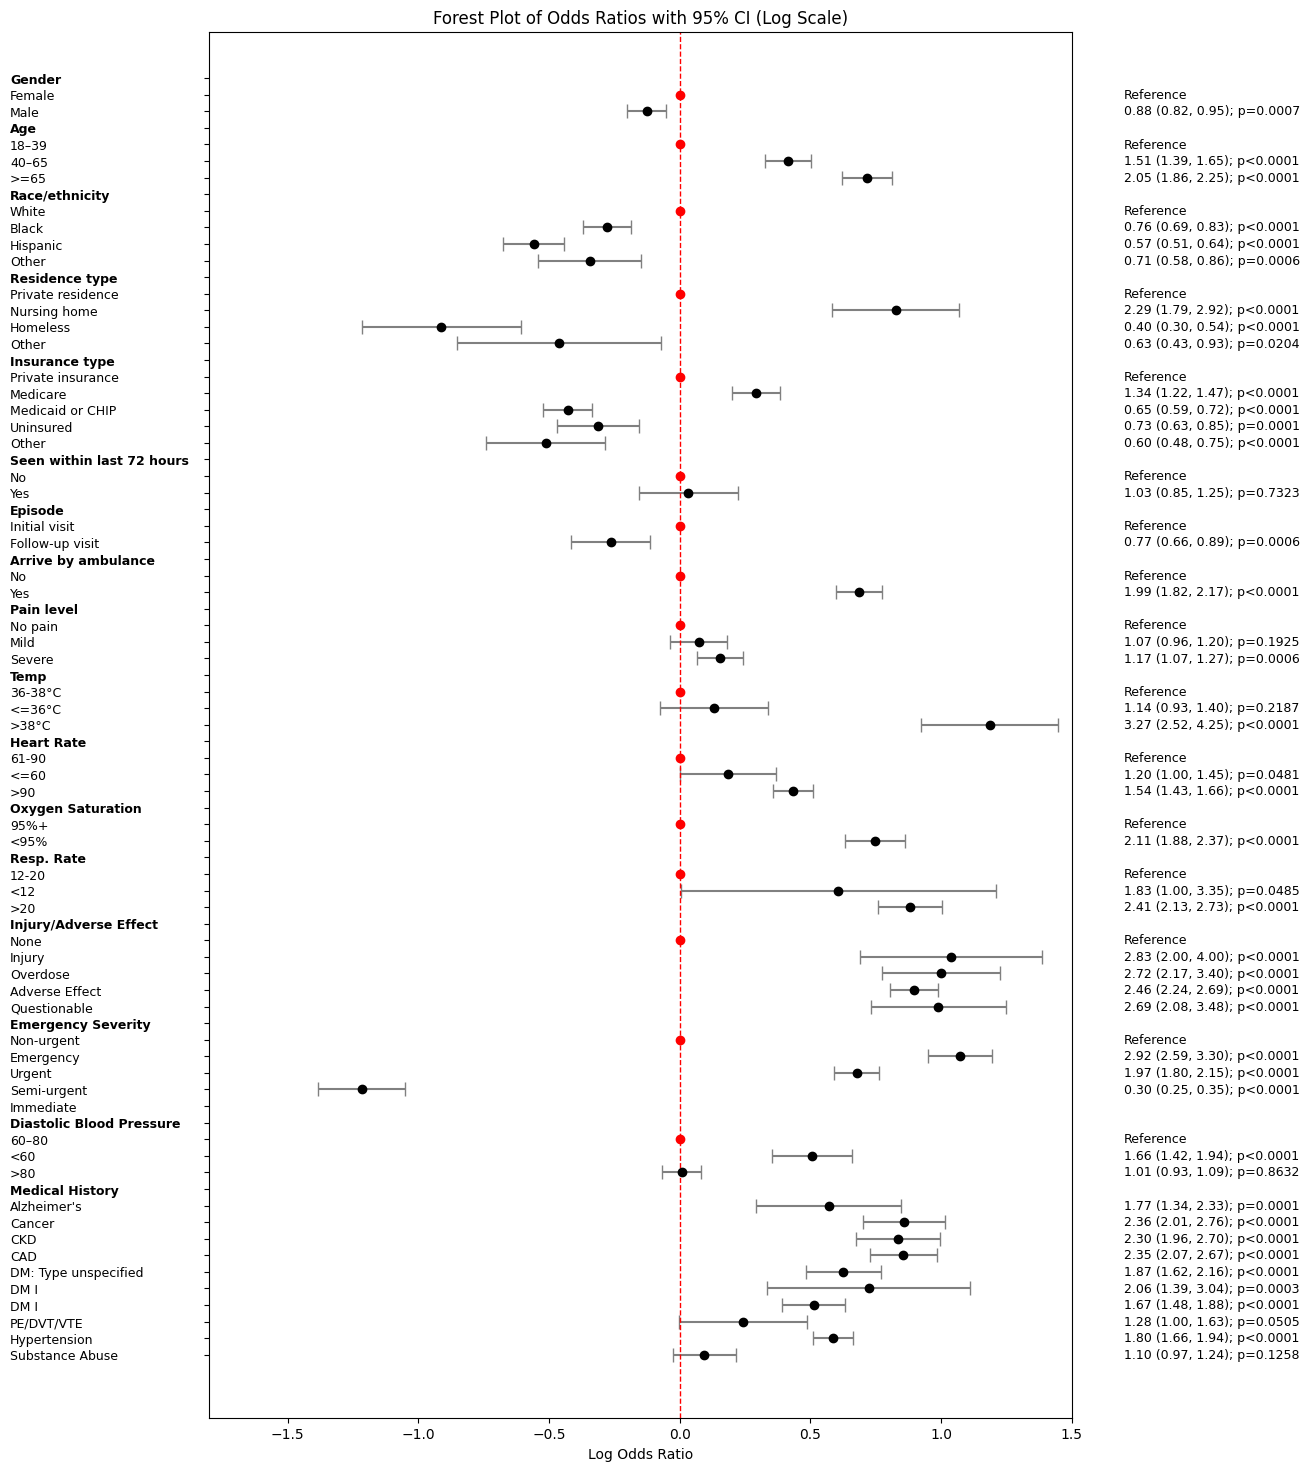

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

medical_history_mapping = {
    "Alzheimer's": "ALZHD",
    "Asthma": "ASTHMA",
    "Cancer": "CANCER",
    "Stroke": "CEBVD",
    "CKD": "CKD",
    "COPD": "COPD",
    "CHF": "CHF",
    "CAD": "CAD",
    "Depression": "DEPRN",
    "DM: Type unspecified": "DIABTYP0",
    "DM I": "DIABTYP1",
    "DM II": "DIABTYP2",
    "ESRD": "ESRD",
    "PE/DVT/VTE": "HPE",
    "HIV": "EDHIV",
    "Hyperlipidemia": "HYPLIPID",
    "Hypertension": "HTN",
    "Obesity": "OBESITY",
    "OSA": "OSA",
    "Osteoporosis": "OSTPRSIS",
    "Substance Abuse": "SUBSTAB"
}


odds_ratios = data['Odds Ratio'].values
ci_lower = data['CI Lower'].values
ci_upper = data['CI Upper'].values
categories = data['Category'].values
p_values = data['p-value'].values


log_odds_ratios = np.log(odds_ratios.astype(float))
log_ci_lower = np.log(ci_lower.astype(float))
log_ci_upper = np.log(ci_upper.astype(float))


keep_indices = []
for i, cat in enumerate(categories):
    is_med_hist = False
    for key in medical_history_mapping:

        if cat.startswith(key):
            is_med_hist = True
            if "Yes" in cat:
                keep_indices.append(i)
            break
    if not is_med_hist:
        keep_indices.append(i)


odds_ratios_f = odds_ratios[keep_indices]
ci_lower_f = ci_lower[keep_indices]
ci_upper_f = ci_upper[keep_indices]
categories_f = categories[keep_indices]
p_values_f = p_values[keep_indices]
log_odds_ratios_f = log_odds_ratios[keep_indices]
log_ci_lower_f = log_ci_lower[keep_indices]
log_ci_upper_f = log_ci_upper[keep_indices]


y_positions = np.arange(len(keep_indices))


non_ref_mask = np.array([pv != "Reference" for pv in p_values_f])


fig, ax = plt.subplots(figsize=(15, 18))


ax.errorbar(log_odds_ratios_f[non_ref_mask],
            y_positions[non_ref_mask],
            xerr=[log_odds_ratios_f[non_ref_mask] - log_ci_lower_f[non_ref_mask],
                  log_ci_upper_f[non_ref_mask] - log_odds_ratios_f[non_ref_mask]],
            fmt='o', color='black', ecolor='gray', capsize=5)


ax.axvline(x=0, linestyle='--', color='red', linewidth=1)


new_categories = []
for cat in categories_f:
    replaced = False

    for key in medical_history_mapping:
        if cat.startswith(key):
            new_categories.append(key)
            replaced = True
            break
    if not replaced:

        if " - " in cat:
            new_categories.append(cat.split(" - ")[0].strip())
        elif ":" in cat:
            new_categories.append(cat.split(":")[0].strip())
        else:
            new_categories.append(cat)

ax.set_yticks(y_positions)
ax.set_yticklabels(new_categories, ha='left', fontsize=9)


bold_categories = ["Gender", "Age", "Race/ethnicity", "Residence type", "Insurance type",
                   "Day of Week", "Arrival time", "Seen within last 72 hours", "Episode",
                   "Arrive by ambulance", "Pain level", "Medical History", "Temp",
                   "Heart Rate", "Oxygen Saturation", "Resp. Rate", "Injury/Adverse Effect",
                   "Emergency Severity", "Diastolic Blood Pressure"]

for i, cat in enumerate(new_categories):
    if cat in bold_categories:
        ax.get_yticklabels()[i].set_fontweight("bold")

ax.tick_params(axis='y', pad=140)


ax.set_xlabel('Log Odds Ratio')
ax.set_title('Forest Plot of Odds Ratios with 95% CI (Log Scale)')

plt.xlim(-1.8, 1.5)
plt.gca().invert_yaxis()


for i, (or_val, ci_low, ci_up, p_val, cat) in enumerate(zip(odds_ratios_f, ci_lower_f, ci_upper_f, p_values_f, categories_f)):

    is_med_hist = any(cat.startswith(key) for key in medical_history_mapping)
    if cat != "" and not cat.endswith(":"):
        if p_val == "Reference" and not is_med_hist:
            ax.plot(0, i, 'o', color='red')
            ax.text(1.7, i, "Reference", verticalalignment='center', fontsize=9)
        else:
            if not np.isnan(or_val) and p_val != "":
                try:
                    p_float = float(p_val)
                    if p_float < 0.0001:
                        p_str = "p<0.0001"
                    else:
                        p_str = f"p={p_val}"
                except:
                    p_str = f"p={p_val}"
                or_text = f"{or_val:.2f} ({ci_low:.2f}, {ci_up:.2f}); {p_str}"
                ax.text(1.7, i, or_text, verticalalignment='center', fontsize=9)
            elif not np.isnan(or_val):
                or_text = f"{or_val:.2f} ({ci_low:.2f}, {ci_up:.2f})"
                ax.text(1.7, i, or_text, verticalalignment='center', fontsize=9)

plt.subplots_adjust(right=0.7)
plt.show()

save_path = '/content/drive/MyDrive/Areas/Papers/GPT Pitts/results/forest_plot.png'
fig.savefig(save_path, dpi=900, bbox_inches='tight')
